# Introduction to linear regression

_Keke Wu_

## Batter up

The movie [Moneyball](https://en.wikipedia.org/wiki/Moneyball_(film)) focuses on the "quest for the secret of success in baseball". It follows a low-budget team, the Oakland Athletics, who believed that underused statistics, such as a player's ability to get on base, better predict the ability to score runs than typical statistics like home runs, RBIs (runs batted in), and batting average. Obtaining players who excelled in these underused statistics turned out to be much more affordable for the team.

In this lab we'll be looking at data from all 30 Major League Baseball teams and examining the linear relationship between runs scored in a season and a number of other player statistics. Our aim will be to summarize these relationships both graphically and numerically in order to find which variable, if any, helps us best predict a team's runs scored in a season.

(Parts of this assignment courtesy the OpenIntro team.)

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns 
import seaborn_qqplot as sqp
import scipy.stats as st
from scipy.stats import pearsonr
# Avoids certain warning messages later
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import statsmodels.formula.api as sm
from statsmodels.graphics.gofplots import qqplot

## The data

Let's load up the data for the 2011 season.

In [2]:
mlb11 = pd.read_csv('mlb11.csv')
print (mlb11.shape)
mlb11.head()

(30, 12)


,team,runs,at_bats,hits,homeruns,bat_avg,strikeouts,stolen_bases,wins,new_onbase,new_slug,new_obs
0,Texas Rangers,855,5659,1599,210,0.283,930,143,96,0.340,0.460,0.800
1,Boston Red Sox,875,5710,1600,203,0.280,1108,102,90,0.349,0.461,0.810
2,Detroit Tigers,787,5563,1540,169,0.277,1143,49,95,0.340,0.434,0.773
3,Kansas City Royals,730,5672,1560,129,0.275,1006,153,71,0.329,0.415,0.744
4,St. Louis Cardinals,762,5532,1513,162,0.273,978,57,90,0.341,0.425,0.766


In addition to runs scored, there are seven traditionally used variables in the data set: at-bats, hits, home runs, batting average, strikeouts, stolen bases, and wins. There are also three newer variables: on-base percentage, [slugging percentage](https://en.wikipedia.org/wiki/Slugging_percentage), and on-base plus slugging. For the first portion of the analysis we'll consider `at_bats` and `homeruns`. For the last part, you'll pick one more variable for your own analysis.

## Part 1: Analyze runs vs at-bats

- Scatter plot
- Compute correlation
- Summarize apparent relationship
- Plot residuals
- Compute linear model
- Scatterplot with regression line
- Check conditions of validity

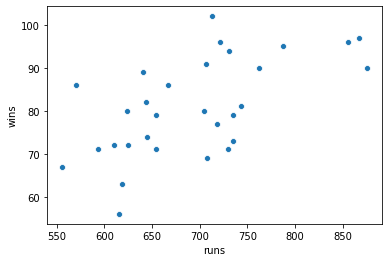

In [3]:
sns.scatterplot(data=mlb11, x='runs', y='wins');

### Question: Describe the relationship between the variables.

What is the form, direction and strength of this relationship?

_There is a slightly positive correlation, which goes from the bottom left to the upper right, and has a medium strength._


### Residuals

Recall that the difference between the observed values and the values predicted by the line are called *residuals*. Note that the data set has 30 observations in total, hence there are 30 residuals.

#### ${e}$<sub>i</sub> = ${y}$<sub>i</sub>−$\bar{y}$<sub>i</sub>

Visualize the residuals using the `residplot()` function from `seaborn`

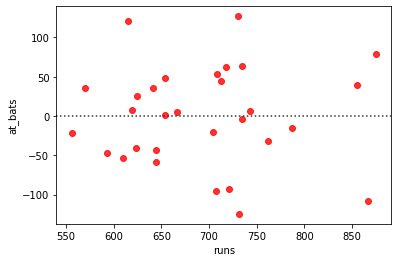

In [4]:
sns.residplot(x='runs', y='at_bats', data=mlb11, color='red');

### The linear model

We will use the OLS package from `statsmodels` which has a more convenient input and output than the  SciKit Learn equivalent. 

- Express the linear relationship as a formula.
- Fit the model
- Show the summary

In [5]:
model1=sm.ols(formula="runs ~ at_bats", data=mlb11)

In [6]:
reg1 = model1.fit()

In [7]:
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   runs   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     16.65
Date:                Sun, 03 Nov 2019   Prob (F-statistic):           0.000339
Time:                        09:47:33   Log-Likelihood:                -167.44
No. Observations:                  30   AIC:                             338.9
Df Residuals:                      28   BIC:                             341.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2789.2429    853.696     -3.267      0.003   -4537.959   -1040.526
at_bats        0.6305      0.155      4.080      0.000       0.314       0.947
==============================================================================
Omnibus:                        2.579   Durbin-Watson:                   1.524
Prob(Omnibus):                  0.275   Jarque-Bera (JB):                1.559
Skew:                           0.544   Prob(JB):                        0.459
Kurtosis:                       3.252   Cond. No.                     3.89e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Understanding the output

- Write the regression equation. It will have the form $runs = \beta_1 + \beta_2 * at\_bats$.

Use the math syntax to display

_$runs = (-2789.2429) + (0.6305) * at\_bats$_

- What is the $R^2$ value? And what is its meaning in this context?

_$R^2$ is 0.373, which indicates that the model doesn't fit the data very well, meaning that there isn't a very strong linear relationship between these two variables._

- What is the 95% confidence interval for the intercept? What does this say about the confidence in any particular prediction that we get from this predictor?

_The 95% CI is [0.025	0.975], it means our coefficients are 95% likely to fall in this range._

### Repeat the scatterplot and include the regression line and confidence interval.

Easiest way is to use `regplot` from seaborn.

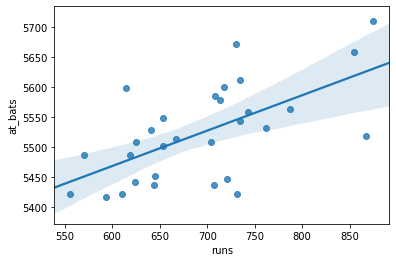

In [8]:
ax = sns.regplot(x="runs", y="at_bats", ci=95, data=mlb11)

### Conditions

- Constant variance
- Nearly normal residuals
    - histogram
    - QQ plot

#### Variance (based on residual plot above)

_The variability of points around the least squares line is not very constant._

#### Normal residuals

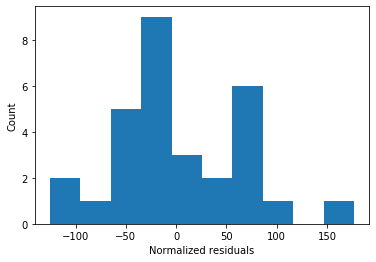

In [9]:
plt.hist(reg1.resid)
plt.ylabel('Count')
plt.xlabel('Normalized residuals');

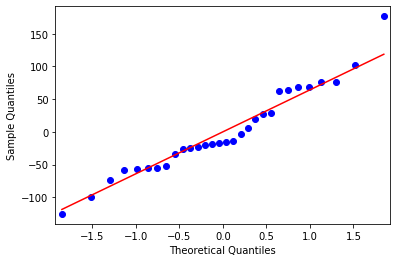

In [10]:
qqplot(reg1.resid, line='s')
plt.show();

#### Conclusion about conditions

_It seems the residuals violate the constant variance condition, and they are not normally distributed, so it wouldn't be appropriate to fit this data to a linear regression model._


## Part 2: Repeat for homeruns vs runs
 
- Scatter plot
- Compute correlation
- Summarize apparent relationship
- Plot residuals
- Compute linear model
- Scatterplot with regression line

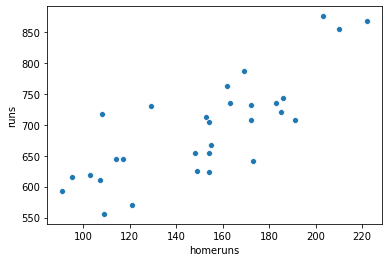

In [11]:
sns.scatterplot(data=mlb11, x='homeruns', y='runs');

In [12]:
# calculate Pearson's correlation
corr, _ = pearsonr(mlb11['homeruns'], mlb11['runs'])
print('Pearsons correlation: %.2f' % corr)

Pearsons correlation: 0.79


### Question: Describe the relationship between the variables.

What is the form, direction and strength of this relationship?

_There is a positive correlation, which goes from the bottom left to the upper right, and has a relatively large strength._

### Residuals

Visualize the residuals using the `residplot()` function from `seaborn`

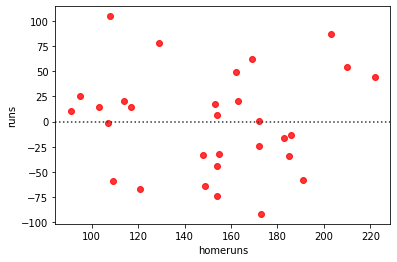

In [13]:
sns.residplot(x='homeruns', y='runs', data=mlb11, color='red');

### The linear model


- Express the linear relationship as a formula.
- Fit the model
- Show the summary

In [14]:
model2=sm.ols(formula="homeruns ~ runs", data=mlb11)

In [15]:
reg2 = model2.fit()

In [16]:
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               homeruns   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     46.98
Date:                Sun, 03 Nov 2019   Prob (F-statistic):           1.90e-07
Time:                        09:47:34   Log-Likelihood:                -134.44
No. Observations:                  30   AIC:                             272.9
Df Residuals:                      28   BIC:                             275.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -85.1566     34.797     -2.447      0.021    -156.435     -13.878
runs           0.3415      0.050      6.854      0.000       0.239       0.444
==============================================================================
Omnibus:                        0.859   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.651   Jarque-Bera (JB):                0.866
Skew:                          -0.351   Prob(JB):                        0.649
Kurtosis:                       2.553   Cond. No.                     6.01e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Understanding the output

- Write the regression equation. 

__$homeruns = (-85.1566) + (0.3415) * runs$__

- What is the $R^2$ value? And what is its meaning in this context?

_$R^2$ is 0.627, which indicates that the model fits the data relatively well, meaning that there is a strong linear relationship between these two variables._

### Repeat the scatterplot and include the regression line and confidence interval.


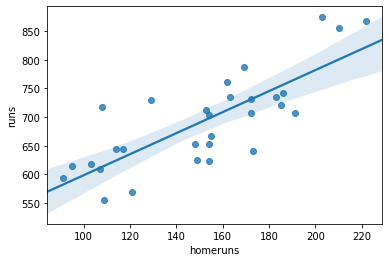

In [17]:
ax = sns.regplot(x="homeruns", y="runs", ci=95, data=mlb11)

### Conditions

- Constant variance
- Nearly normal residuals
    - histogram
    - QQ plot

#### Variance (based on residual plot above)

_The variability of points around the least squares line is roughly constant._

#### Normal residuals

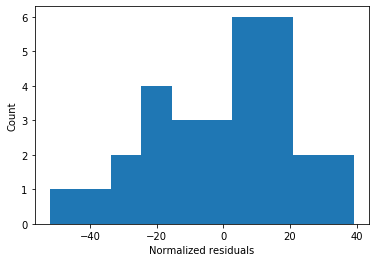

In [18]:
plt.hist(reg2.resid)
plt.ylabel('Count')
plt.xlabel('Normalized residuals');

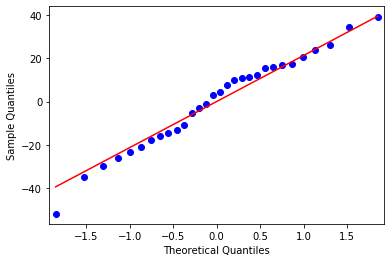

In [19]:
qqplot(reg2.resid, line='s')
plt.show();

#### Conclusion about conditions

_The residuals meets the constant variance condition, the distribution isn't normal, so it might not be appropriate to fit this data to a linear regression model._

## Part 3: Pick one other variable from the data frame and repeat the analysis from above
 
- Scatter plot
- Compute correlation
- Summarize apparent relationship
- Plot residuals
- Compute linear model
- Scatterplot with regression line

### Compare runs and strikeouts

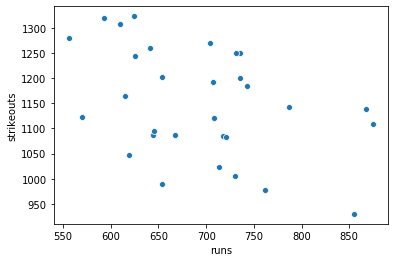

In [20]:
sns.scatterplot(data=mlb11, x='runs', y='strikeouts');

In [21]:
# calculate Pearson's correlation
corr, _ = pearsonr(mlb11['runs'], mlb11['strikeouts'])
print('Pearsons correlation: %.2f' % corr)

Pearsons correlation: -0.41


_There is a negative correlation, which goes from the top left to the bottom right, and has a relatively medium strength._

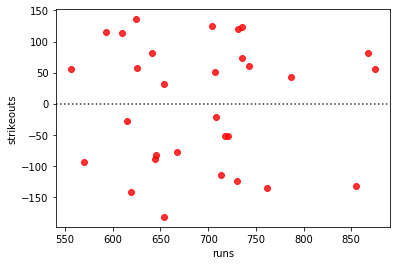

In [22]:
sns.residplot(x='runs', y='strikeouts', data=mlb11, color='red');

In [23]:
model3=sm.ols(formula="runs ~ strikeouts", data=mlb11)
reg3 = model3.fit()
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   runs   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     5.709
Date:                Sun, 03 Nov 2019   Prob (F-statistic):             0.0239
Time:                        09:47:35   Log-Likelihood:                -171.65
No. Observations:                  30   AIC:                             347.3
Df Residuals:                      28   BIC:                             350.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1054.7342    151.789      6.949      0.000     743.809    1365.660
strikeouts    -0.3141      0.131     -2.389      0.024      -0.583      -0.045
==============================================================================
Omnibus:                        1.628   Durbin-Watson:                   1.382
Prob(Omnibus):                  0.443   Jarque-Bera (JB):                1.244
Skew:                           0.491   Prob(JB):                        0.537
Kurtosis:                       2.827   Cond. No.                     1.25e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

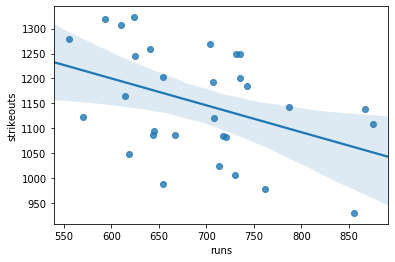

In [24]:
ax = sns.regplot(x="runs", y="strikeouts", ci=95, data=mlb11)

#### Variance 

_The variability of points around the least squares line is roughly constant._

#### Normal residuals

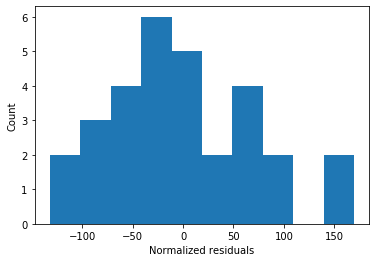

In [25]:
plt.hist(reg3.resid)
plt.ylabel('Count')
plt.xlabel('Normalized residuals');

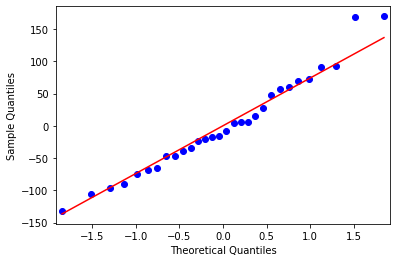

In [26]:
qqplot(reg3.resid, line='s')
plt.show();

#### Conclusion

_The residuals meets the constant variance condition, the distribution is nearly normal, so it's likely to be appropriate to fit this data to a linear regression model._

### Note

You might be wondering whether we can combine multiple predictor variables. We can! That is the topic for next week.